In [2]:
import networkx as nx
import pickle

import numpy as np; np.set_printoptions(suppress=True, linewidth=180); np.seterr(divide='ignore')
import pandas as pd; pd.set_option('display.width', 500)


from plot_module import plot_ode_results, plot_sde_results, plot_simulator_graph, plot_neuron_graph_subset
from sim_param_from_network import names_from_network, sde_param_from_network, ode_from_network, start_state_from_nodes
from neuron_graph_process import neuron_graph_process
from neuron_graph_helper import load_pickled_neuron_graph
from analyse_simulation import two_component_statistics

from simulate import simulate_ode, simulate_gillespie, simulate_tauleaping

In [3]:
G = load_pickled_neuron_graph('neuron_graphs/2_compartment_model.pkl')

In [4]:
DELTA = 0.25
G.nodes()['S0B']['delta'] = DELTA

VARS, NODES = names_from_network(G)
START_STATE = start_state_from_nodes(G, heteroplasmy=0.5, delta=DELTA)


C_B_val = [
    0.10,
    0.05,
    0.0100,
    0.0050,
    0.0025,
    0.00100, 
    0.00075,
    0.00050,
    0.00040,
    0.00030,
    0.00020,
    0.000100, 
    0.000090,
    0.000080, 
    0.000070,
    0.000060, 
    0.000050, 
    0.000040, 
    0.000030, 
    0.000020, 
    0.0000100,
    0.0000050,
    0.0000025,
    0.0000010, 
    0.00000010, 
    0.000000010, 
    0.0000000010, 
    0.00000000010, 
    0.000000000010, 
    0.0000000000010,
]

In [5]:
TIME_POINTS = np.linspace(0, 4000, 1001)
REP = 50

C_B_val = [0.1]
for c_b in C_B_val:
    print(f"\n<<<< STARTING SIMULATION WITH C_B = {c_b} >>>>\n")
    
    G.nodes()['S0B']['c_b'] = c_b

#     # infer the ode model
#     ode_model = ode_from_network(G, prnt=True)

#     # run the ode model
#     ode_results = simulate_ode(ode_model, TIME_POINTS, START_STATE)
#     plot_ode_results(ode_results, TIME_POINTS, DELTA, VARS, NODES, prnt=False)

    # infer the parameterse of the sde systems
    SDE_PARAM = sde_param_from_network(G, prnt=False)

    # run the gillespie simulation
    gillespie_results = simulate_gillespie(SDE_PARAM, TIME_POINTS, START_STATE, replicates=REP)
    plot_sde_results(gillespie_results, TIME_POINTS, DELTA, VARS, NODES, prnt = False)
    df_g = two_component_statistics(gillespie_results, DELTA)
    print(df_g.iloc[[0, -1]]);print()
    
    
    
    # run the tau leaping simulation
    tauleaping_results = simulate_tauleaping(SDE_PARAM, TIME_POINTS, START_STATE, replicates=REP, timestep=0.01)
    #plot_sde_results(tauleaping_results, TIME_POINTS, DELTA, VARS, NODES, prnt = False)
    df_t = two_component_statistics(tauleaping_results, DELTA)
    print(df_t.iloc[[0, -1]]);print()
    
    print("\n ----- \n")

>> Code for ODE model:

global ODE_model
def ODE_model(t, z):
	# variables (node name + wt/mt)
	S0B_wt, S0B_mt, A2B_wt, A2B_mt = z
	return [
		# ΔS0B_wt/Δt
		(S0B_wt*((0.8 + 1e-05*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_wt*0.4),
		# ΔS0B_mt/Δt
		(S0B_mt*((0.8 + 1e-05*(200-S0B_wt-(0.25*S0B_mt)))-(0.4)-(0.8)))+(A2B_mt*0.4),
		# ΔA2B_wt/Δt
		(A2B_wt*(0-(0.4)-(0.4)))+(S0B_wt*0.8),
		# ΔA2B_mt/Δt
		(A2B_mt*(0-(0.4)-(0.4)))+(S0B_mt*0.8),
		]



<<<< STARTING SIMULATION WITH C_B = 0.1 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [11:11<00:00,  7.45it/s]


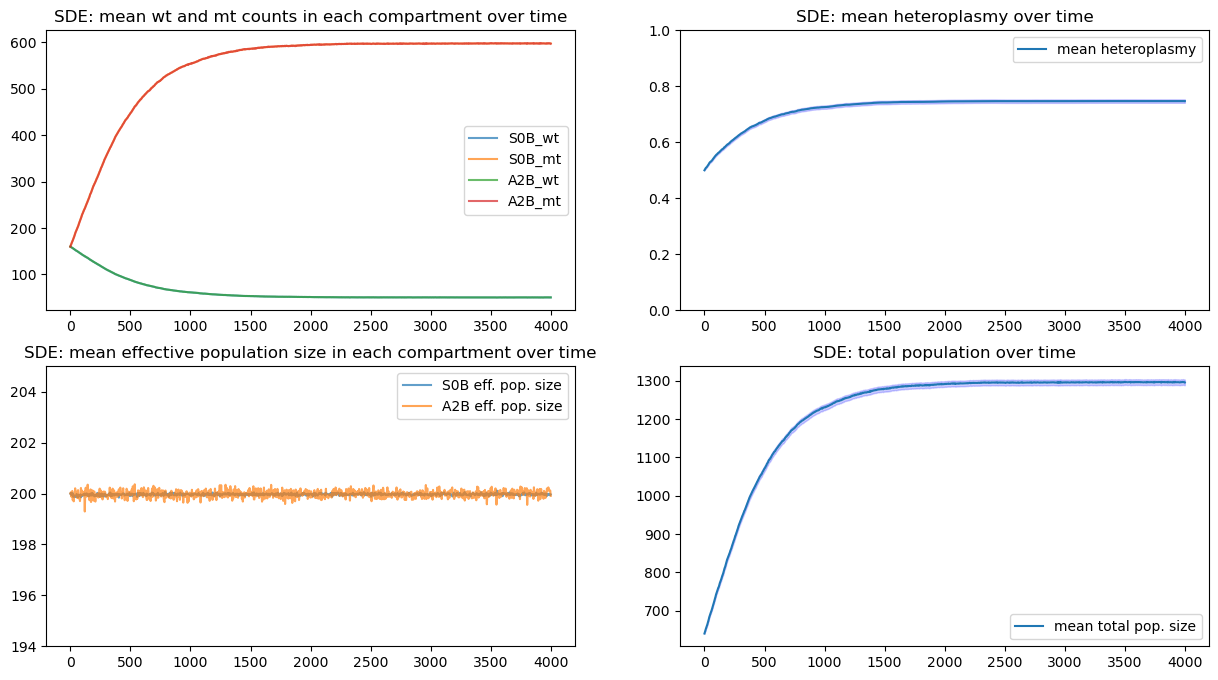


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.7471 +-0.0061
delta: 0.2471

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000    0.000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000   1295.87     7.38    399.88     0.13    0.7471   0.0061    0.747   0.2528     0.0      50.56      1.23     597.62      4.92      50.65      1.24     597.03      4.92

simulating using tau leaping...


100%|██████████| 5000/5000 [03:15<00:00, 25.59it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00       0.0
1000   1302.11     7.35    399.93     0.13    0.7516   0.0061   0.7516   0.2484     0.0      49.64      1.22     601.16      4.89      49.56      1.22     601.75       4.9


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.05 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [11:05<00:00,  7.52it/s]


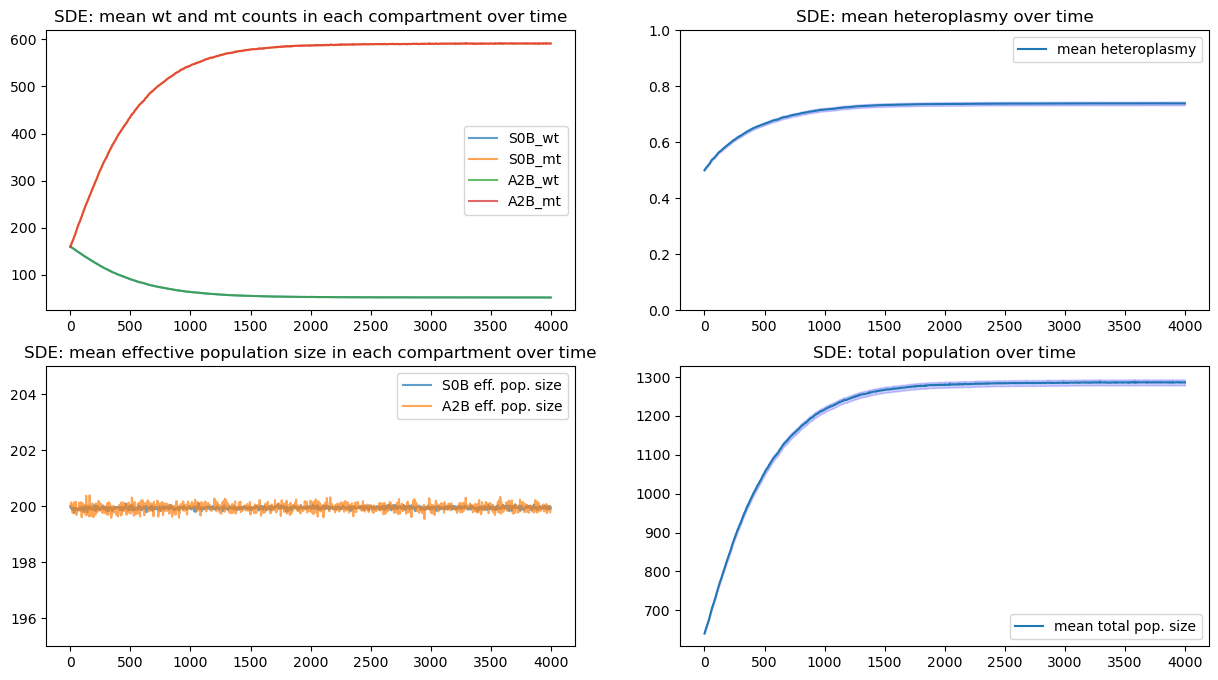


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.7388 +-0.0062
delta: 0.2388

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000   1286.28     7.46    399.83     0.13    0.7388   0.0062   0.7388   0.2612     0.0      52.19      1.24     590.97      4.97      52.16      1.24     590.95      4.98

simulating using tau leaping...


100%|██████████| 5000/5000 [03:14<00:00, 25.72it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00     0.500   0.0000   0.0000    0.000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00       0.0
1000   1283.45     7.49    400.13     0.13     0.736   0.0062   0.7358    0.264     0.0      52.76      1.25     588.67      4.99      52.93      1.25     589.08       5.0


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.01 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [10:23<00:00,  8.03it/s]


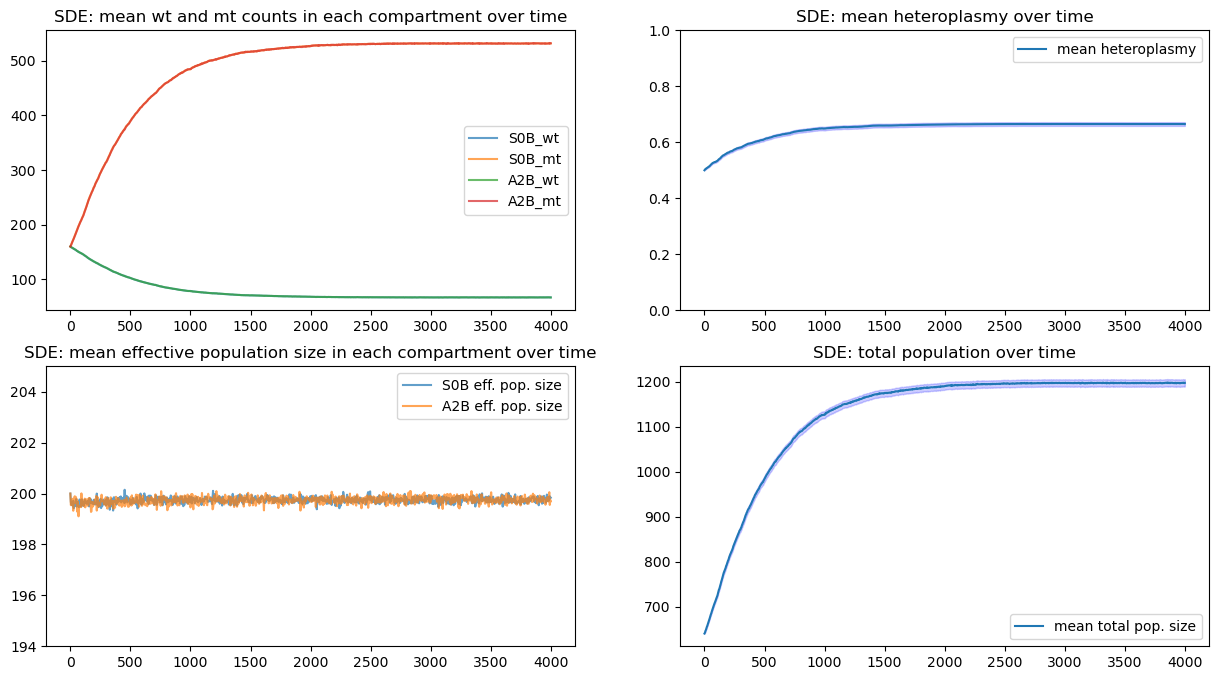


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.6652 +-0.0067
delta: 0.1652

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000    0.000   0.0000     0.0     160.00      0.00      160.0      0.00     160.00      0.00     160.00      0.00
1000   1197.43     8.02    399.53     0.14    0.6652   0.0067    0.665   0.3348     0.0      66.89      1.34      531.8      5.34      66.67      1.33     532.07      5.35

simulating using tau leaping...


100%|██████████| 5000/5000 [03:08<00:00, 26.54it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000   1187.81     8.06    399.31     0.14    0.6576   0.0067   0.6572   0.3424     0.0      68.11      1.34     525.16      5.36      68.36      1.34     526.18      5.38


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.005 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [09:47<00:00,  8.51it/s]


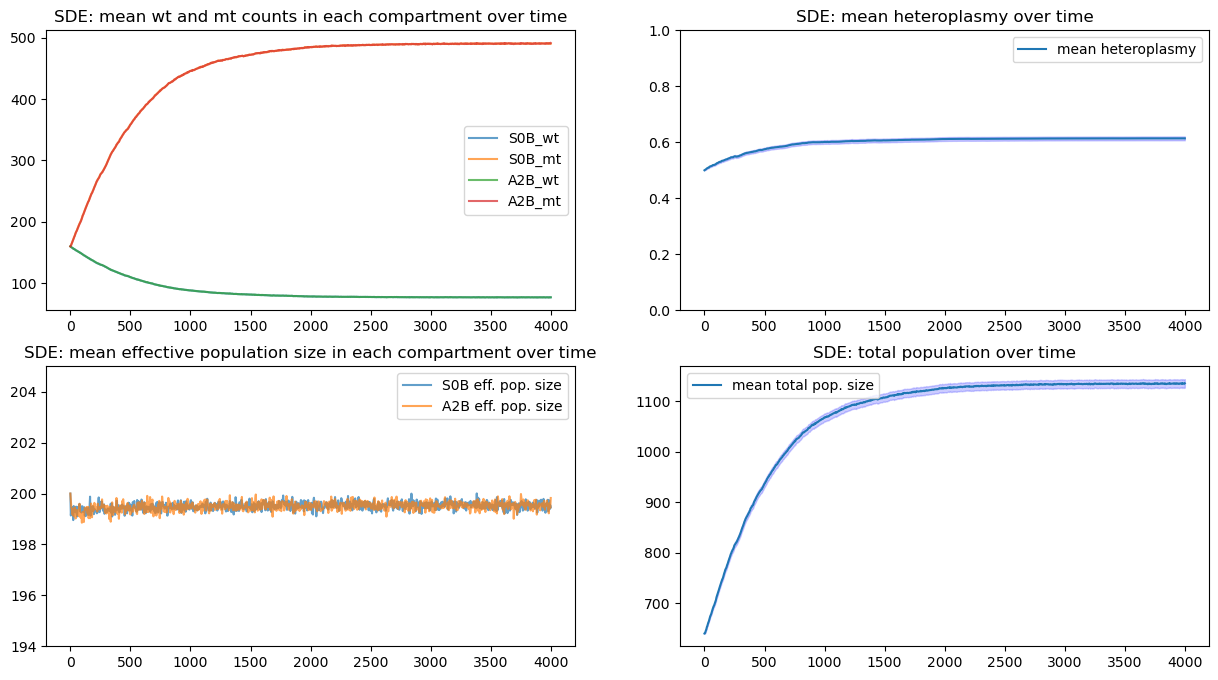


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.614 +-0.0069
delta: 0.114

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00     0.500   0.0000   0.0000    0.000     0.0      160.0      0.00     160.00       0.0     160.00      0.00     160.00      0.00
1000   1135.45     8.27    399.28     0.19     0.614   0.0069   0.6138    0.386     0.0       76.9      1.38     490.21       5.5      76.99      1.38     491.35      5.52

simulating using tau leaping...


100%|██████████| 5000/5000 [03:04<00:00, 27.12it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00     400.0     0.00    0.5000   0.0000   0.0000    0.000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000   1134.28     8.28     399.4     0.19    0.6128   0.0069   0.6124    0.387     0.0      77.27      1.38     489.91      5.52      77.17      1.38     489.93      5.52


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.0025 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [09:23<00:00,  8.87it/s]


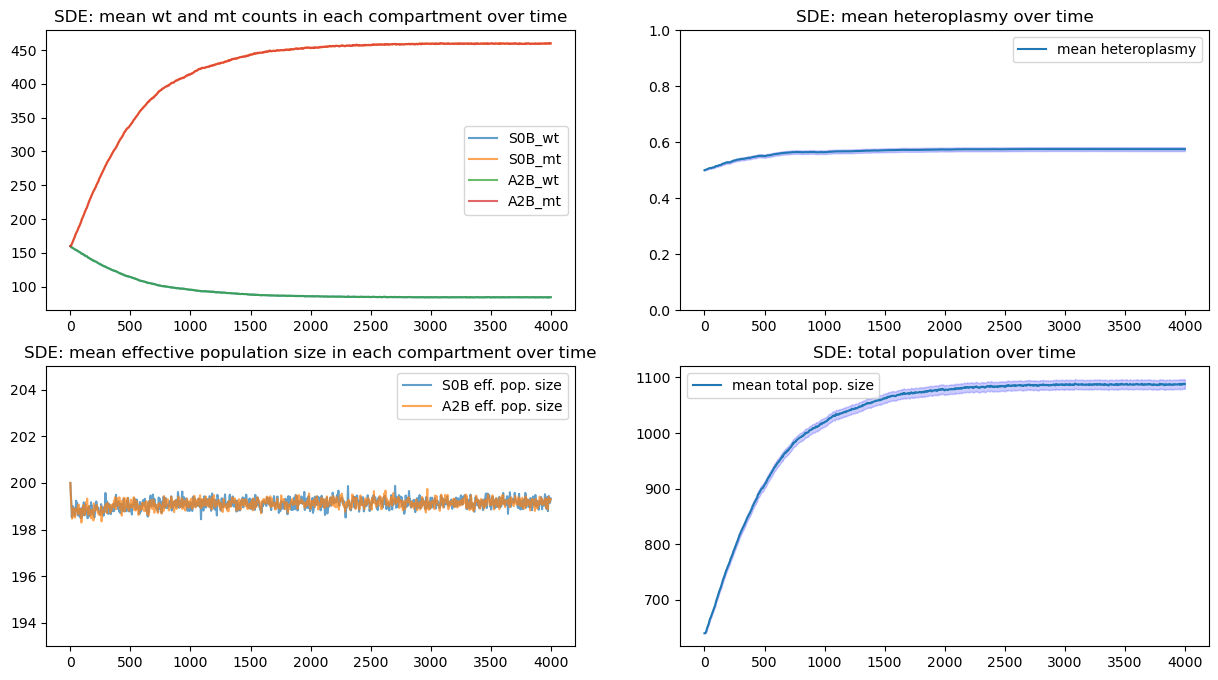


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5754 +-0.007
delta: 0.0754

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000    0.000   0.0000   0.0000     0.0      160.0       0.0     160.00       0.0     160.00       0.0     160.00       0.0
1000   1088.24     8.41    398.63     0.27    0.5754    0.007   0.5752   0.4246     0.0       84.4       1.4     459.76       5.6      84.37       1.4     459.71       5.6

simulating using tau leaping...


100%|██████████| 5000/5000 [03:01<00:00, 27.48it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00      0.0    400.00     0.00    0.5000    0.000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000   1094.45      8.4    398.14     0.28    0.5814    0.007   0.5806   0.4182     0.0      83.06      1.39     464.33      5.59      82.98      1.39     464.09      5.58


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.001 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [08:57<00:00,  9.30it/s]


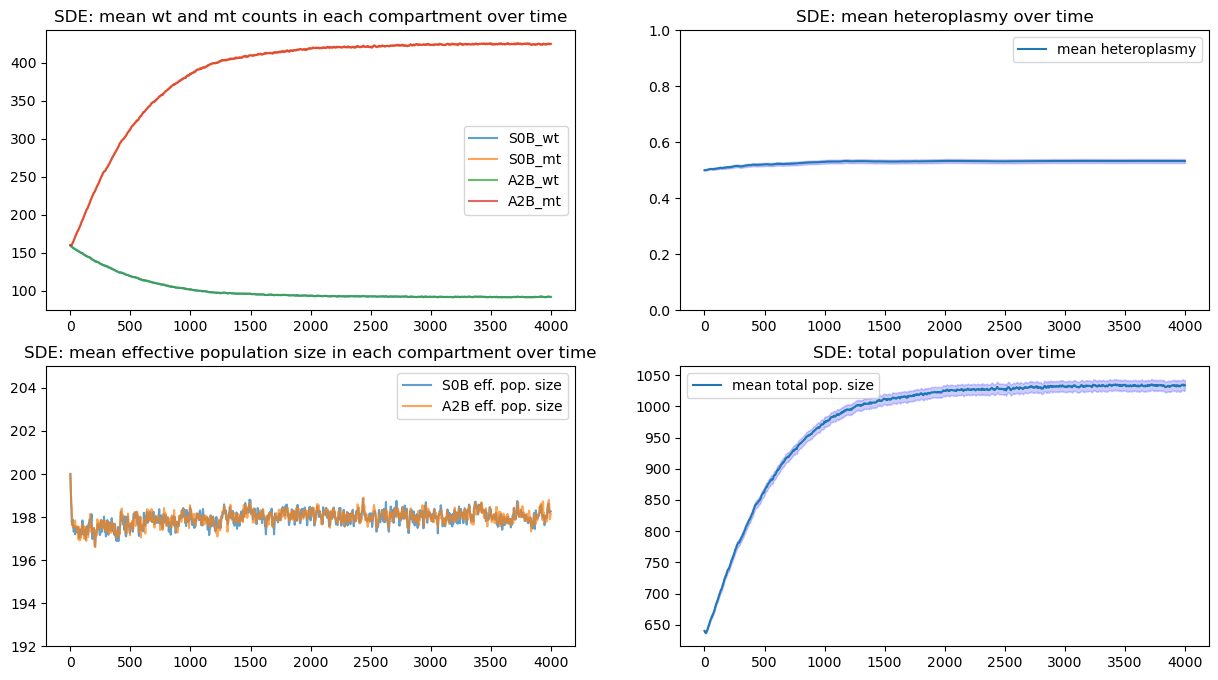


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.533 +-0.0071
delta: 0.033

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00     0.500   0.0000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000   1033.72     8.53    396.41     0.48     0.533   0.0071   0.5328   0.4666     0.0      92.08      1.41     424.75      5.65      91.89      1.41     425.01      5.65

simulating using tau leaping...


100%|██████████| 5000/5000 [02:58<00:00, 28.00it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0001
pooled t-test p-value: 0.0001

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0        640.0     0.00    400.00     0.00    0.5000   0.0000    0.000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    1027.3     8.53    396.63     0.48    0.5272   0.0071    0.527   0.4726     0.0      93.36      1.42     420.66      5.66      93.04      1.41     420.24      5.65


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.00075 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [08:54<00:00,  9.35it/s]


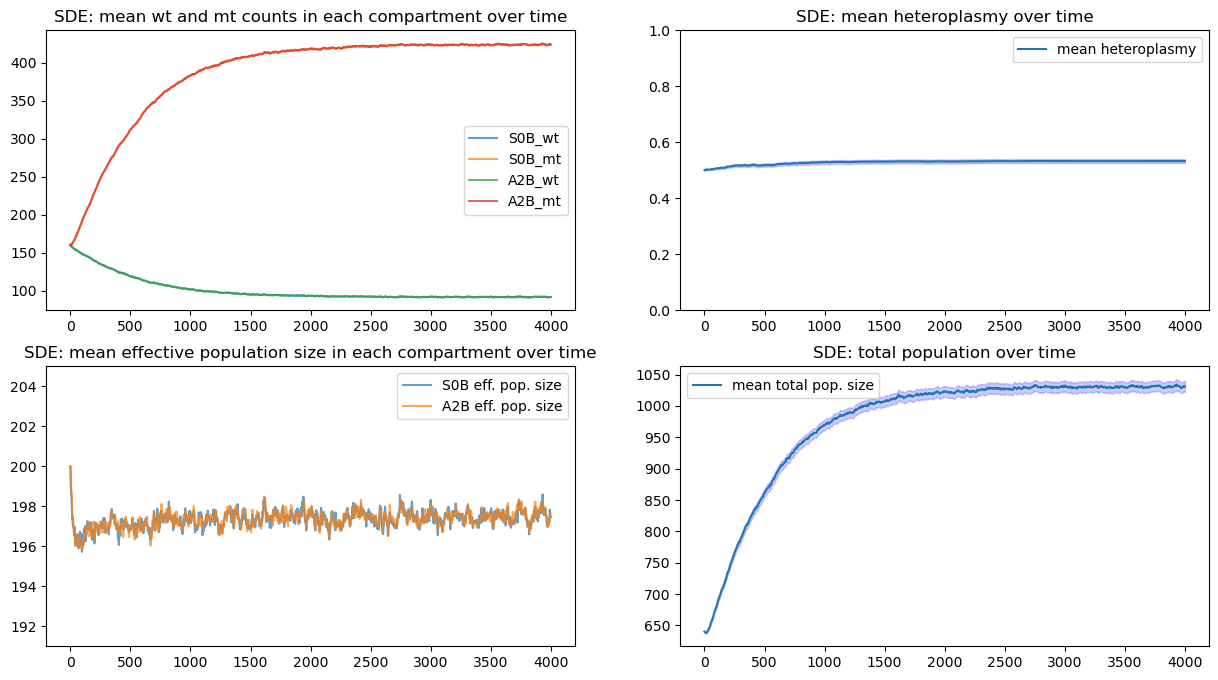


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5329 +-0.0071
delta: 0.0329

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000   1031.11     8.54    395.11     0.56    0.5329   0.0071   0.5324   0.4668     0.0      91.49      1.41     423.92      5.64      91.62      1.41     424.08      5.64

simulating using tau leaping...


100%|██████████| 5000/5000 [02:59<00:00, 27.89it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000    0.000   0.0000   0.0000     0.0     160.00       0.0     160.00      0.00     160.00       0.0     160.00      0.00
1000   1042.87     8.53    394.33     0.56    0.5439    0.007   0.5438   0.4558     0.0      89.11       1.4     431.97      5.63      89.04       1.4     432.76      5.63


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.0005 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [08:46<00:00,  9.50it/s]


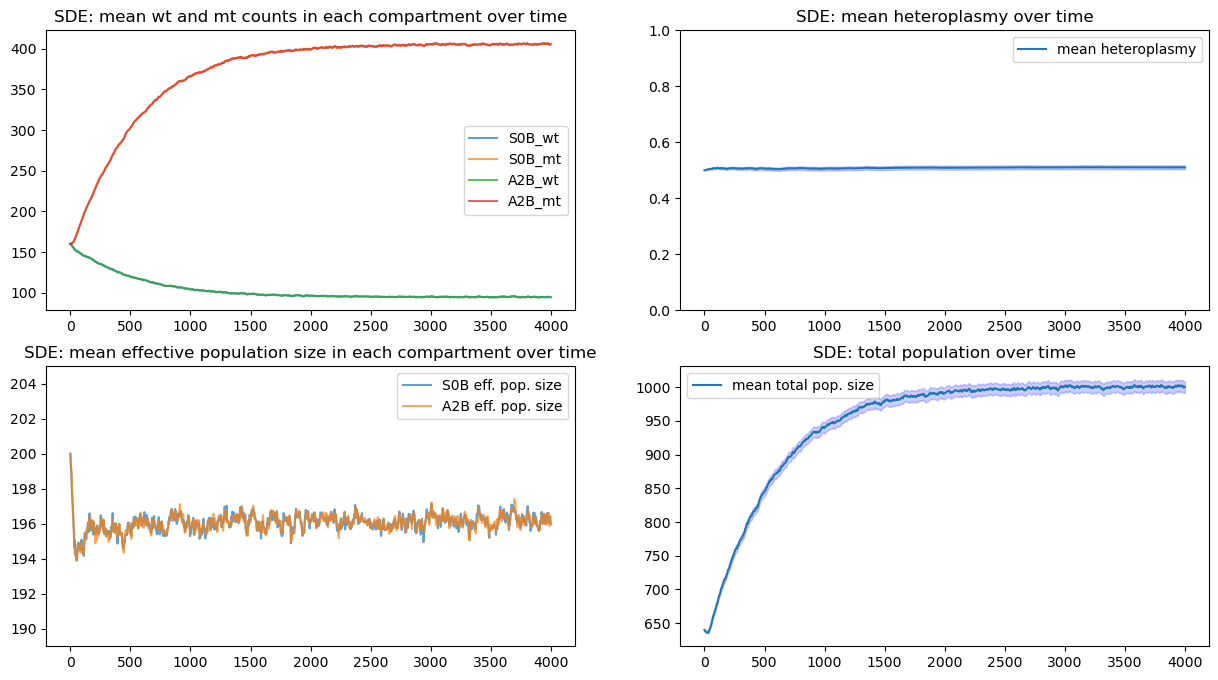


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5104 +-0.0071
delta: 0.0104

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0249
  wilcox test p-value: 0.0707
pooled t-test p-value: 0.075

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000   1000.36     8.62    391.98     0.72    0.5104   0.0071   0.5104   0.4896     0.0      94.51      1.41     405.77      5.66      94.67      1.41     405.39      5.65

simulating using tau leaping...


100%|██████████| 5000/5000 [02:58<00:00, 28.06it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0046
  wilcox test p-value: 0.0272
pooled t-test p-value: 0.029

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000     0.0     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000   1002.56     8.56    392.79     0.73    0.5136   0.0071   0.5134   0.4862     0.0      94.93      1.42     406.54      5.64      94.61      1.42     406.49      5.63


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.0004 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [08:40<00:00,  9.62it/s]


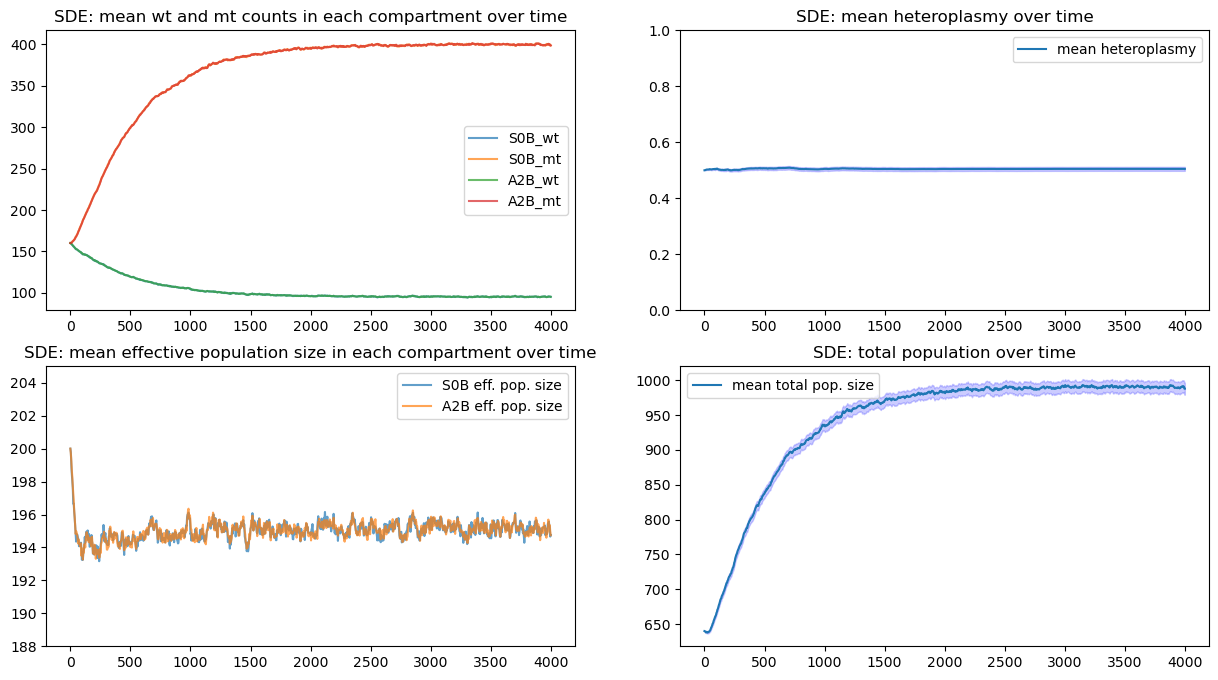


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.505 +-0.0071
delta: 0.005

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.1777
  wilcox test p-value: 0.2396
pooled t-test p-value: 0.2439

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00     400.0     0.00     0.500   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00      160.0      0.00
1000    987.72     8.62     389.5     0.82     0.505   0.0071   0.5044   0.4944  0.0006      95.06      1.41     398.82      5.64      95.04      1.41      398.8      5.64

simulating using tau leaping...


100%|██████████| 5000/5000 [02:58<00:00, 28.03it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0633
  wilcox test p-value: 0.1289
pooled t-test p-value: 0.1296

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00       0.0     160.00      0.00     160.00       0.0     160.00      0.00
1000    995.85     8.69    390.05     0.82    0.5081   0.0071   0.5078   0.4918  0.0002      93.96       1.4     403.88      5.67      94.16       1.4     403.86      5.67


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.0003 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [08:40<00:00,  9.61it/s]


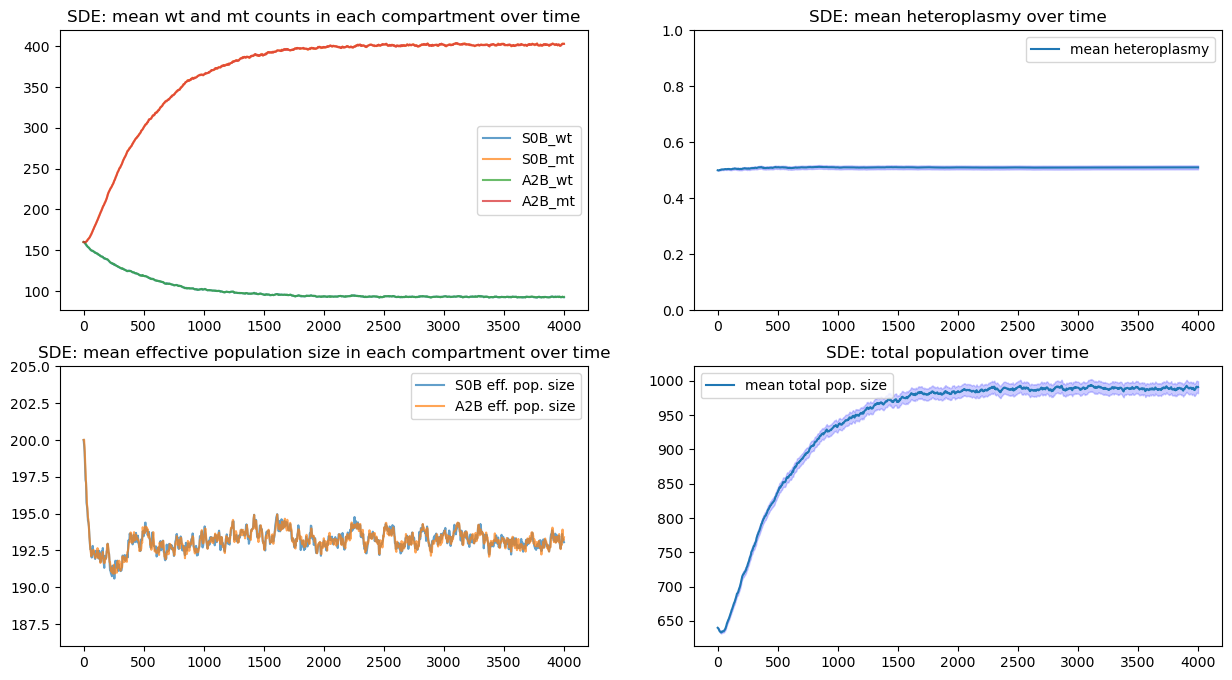


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5103 +-0.0071
delta: 0.0103

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0258
  wilcox test p-value: 0.0763
pooled t-test p-value: 0.0628

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    990.82     8.73    386.46     0.97    0.5103   0.0071   0.5088   0.4886  0.0022      92.33      1.41     402.93      5.66      92.67      1.41     402.89      5.66

simulating using tau leaping...


100%|██████████| 5000/5000 [02:57<00:00, 28.24it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.027
  wilcox test p-value: 0.0743
pooled t-test p-value: 0.0774

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00      0.0    400.00     0.00    0.5000   0.0000    0.000   0.0000   0.000     160.00      0.00     160.00      0.00     160.00       0.0     160.00      0.00
1000    988.34      8.7    385.79     0.99    0.5102   0.0071    0.509   0.4886   0.002      92.77      1.42     401.62      5.64      92.18       1.4     401.77      5.64


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.0002 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [08:34<00:00,  9.73it/s]


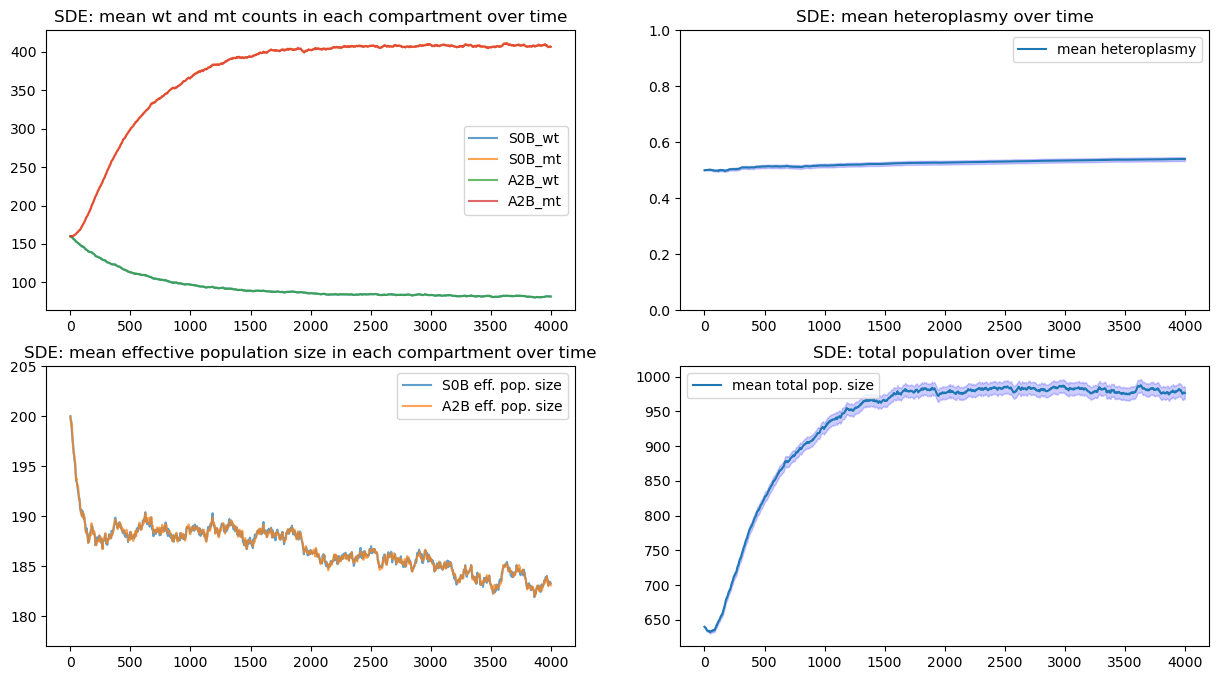


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5401 +-0.007
delta: 0.0401

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    976.37     9.03    366.38     1.53    0.5401   0.0072   0.5196   0.4424  0.0378      81.59      1.39     406.79      5.64      81.46      1.39     406.52      5.63

simulating using tau leaping...


100%|██████████| 5000/5000 [02:52<00:00, 28.97it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0007
pooled t-test p-value: 0.0007

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00       0.0     160.00      0.00     160.00       0.0     160.00      0.00
1000    957.11     9.08    365.92     1.57    0.5231   0.0072   0.5014   0.4572  0.0412      84.46       1.4     394.27      5.66      84.41       1.4     393.98      5.65


 ----- 


<<<< STARTING SIMULATION WITH C_B = 0.0001 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [07:37<00:00, 10.93it/s]


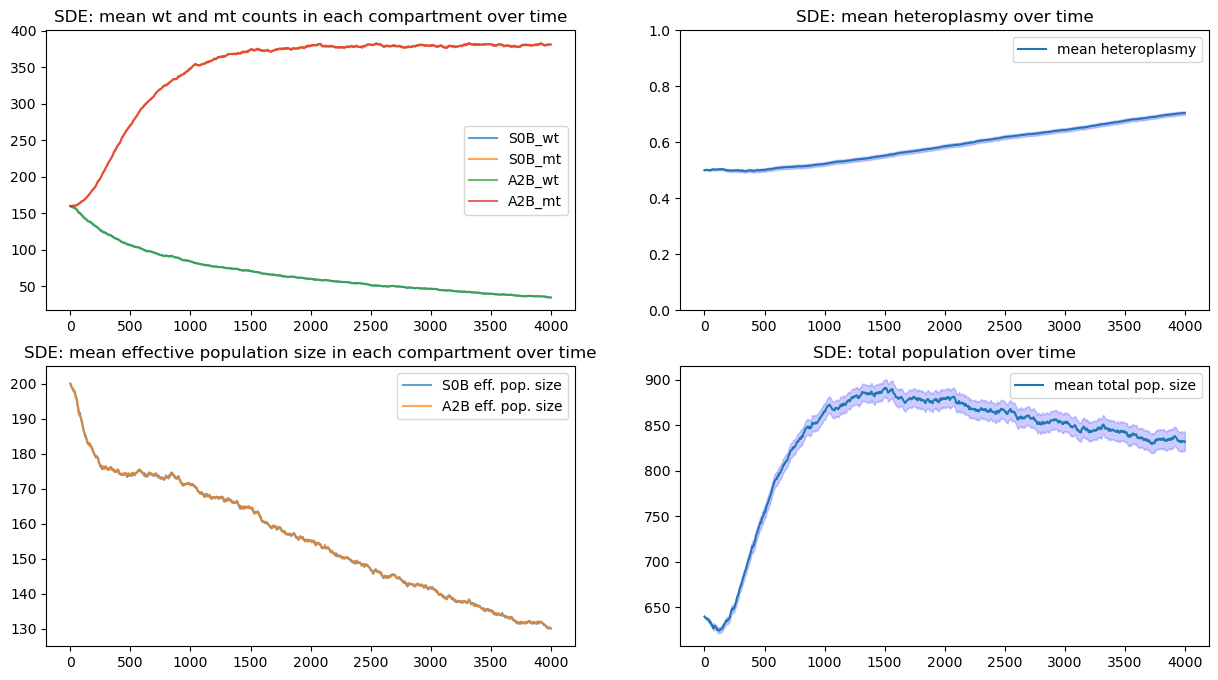


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.7043 +-0.0065
delta: 0.2043

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00      0.0    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    831.76    10.55    260.12      2.7    0.7043   0.0077   0.4934   0.2072  0.2994      34.73      1.08     381.27      5.66      34.84      1.08     380.92      5.65

simulating using tau leaping...


100%|██████████| 5000/5000 [02:31<00:00, 33.09it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000      160.0      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    830.67    10.59    258.35     2.73    0.7123   0.0077   0.4938   0.1994  0.3068       33.8      1.07     381.25      5.66      33.78      1.07     381.85      5.67


 ----- 


<<<< STARTING SIMULATION WITH C_B = 9e-05 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [07:34<00:00, 11.01it/s]


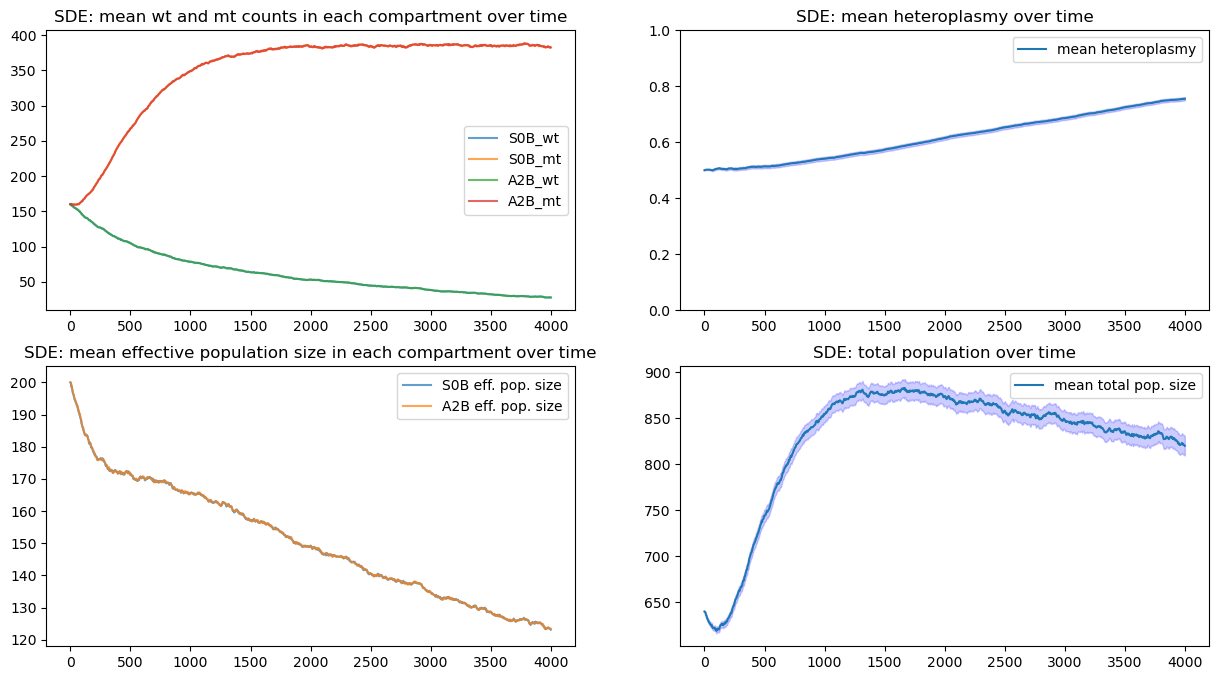


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.7552 +-0.0061
delta: 0.2552

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000    0.000  0.0000     160.00       0.0     160.00       0.0     160.00       0.0     160.00      0.00
1000    820.05    10.61    246.61     2.75    0.7552   0.0074   0.5032    0.163  0.3334      27.71       1.0     381.78       5.6      27.75       1.0     382.81      5.61

simulating using tau leaping...


100%|██████████| 5000/5000 [02:28<00:00, 33.60it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00     0.500   0.0000   0.0000    0.000  0.0000     160.00      0.00     160.00      0.00      160.0      0.00      160.0      0.00
1000    830.81    10.74    248.25     2.76     0.757   0.0074   0.5048    0.162  0.3332      27.06      0.97     388.54      5.68       27.0      0.97      388.2      5.67


 ----- 


<<<< STARTING SIMULATION WITH C_B = 8e-05 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [07:15<00:00, 11.48it/s]


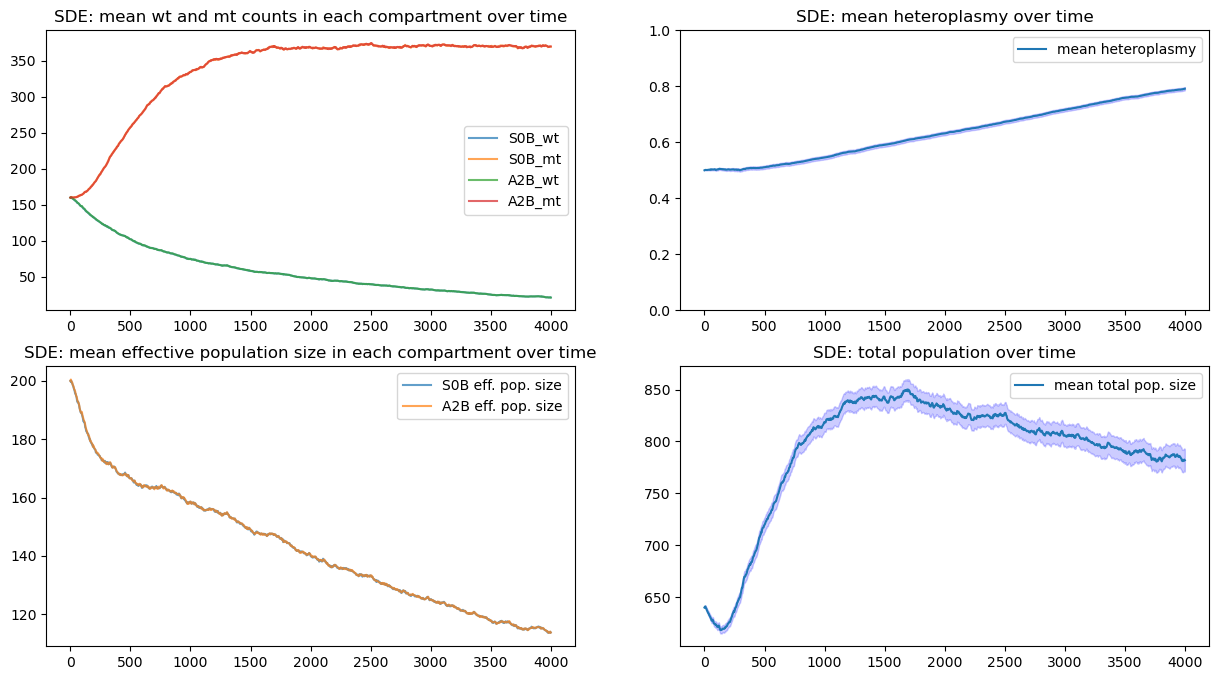


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.7913 +-0.0057
delta: 0.2913

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    781.86    10.81    227.43     2.81    0.7913   0.0073   0.4868   0.1284  0.3846      21.37      0.89     369.41      5.62      21.24      0.88     369.84      5.62

simulating using tau leaping...


100%|██████████| 5000/5000 [02:21<00:00, 35.30it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0        640.0     0.00    400.00     0.00    0.5000   0.0000   0.0000    0.000  0.0000     160.00      0.00     160.00      0.00      160.0      0.00     160.00      0.00
1000     782.8    10.94    224.39     2.83    0.8072   0.0072   0.4858    0.116  0.3982      19.15      0.85     372.42      5.67       19.1      0.85     372.14      5.66


 ----- 


<<<< STARTING SIMULATION WITH C_B = 7e-05 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [07:00<00:00, 11.88it/s]


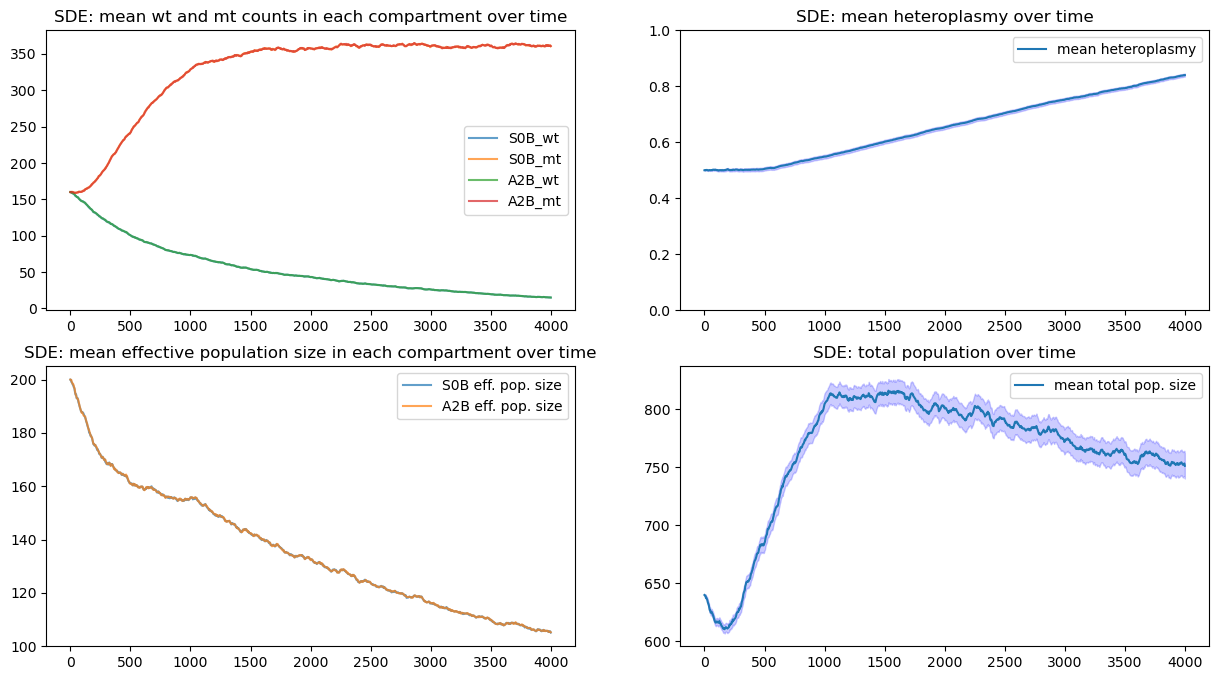


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.84 +-0.0052
delta: 0.34

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00      0.50   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00      160.0      0.00     160.00      0.00
1000    751.27    10.93    210.42     2.85      0.84   0.0069   0.4768   0.0908  0.4322      15.03      0.78     360.42      5.61       15.1      0.78     360.71      5.61

simulating using tau leaping...


100%|██████████| 5000/5000 [02:17<00:00, 36.33it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00     0.500   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    759.19    10.93    213.37     2.85     0.836   0.0069   0.4822   0.0946  0.4232      15.72      0.79     363.82      5.62      15.72      0.79     363.94      5.62


 ----- 


<<<< STARTING SIMULATION WITH C_B = 6e-05 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [06:35<00:00, 12.63it/s]


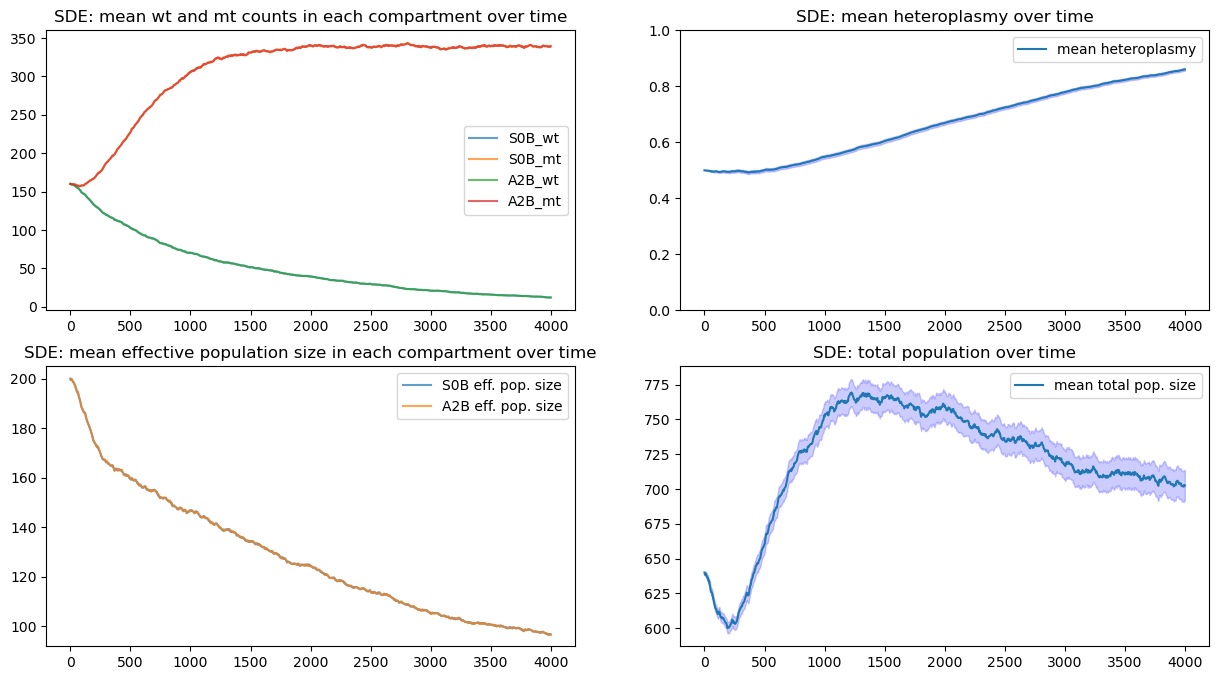


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.8602 +-0.0049
delta: 0.3602

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000   0.000     160.00      0.00     160.00      0.00     160.00      0.00      160.0      0.00
1000    702.53    10.96    193.59     2.84    0.8602   0.0067   0.4542   0.0738   0.472      11.93      0.69     338.99      5.59      12.01      0.69      339.6      5.59

simulating using tau leaping...


100%|██████████| 5000/5000 [02:12<00:00, 37.84it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00      0.0    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00      160.0       0.0     160.00      0.00     160.00       0.0
1000    729.07     11.0    198.21     2.84    0.8823   0.0062   0.4752   0.0634  0.4614      10.58      0.65      354.0       5.6      10.67      0.66     353.81       5.6


 ----- 


<<<< STARTING SIMULATION WITH C_B = 5e-05 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [06:15<00:00, 13.32it/s]


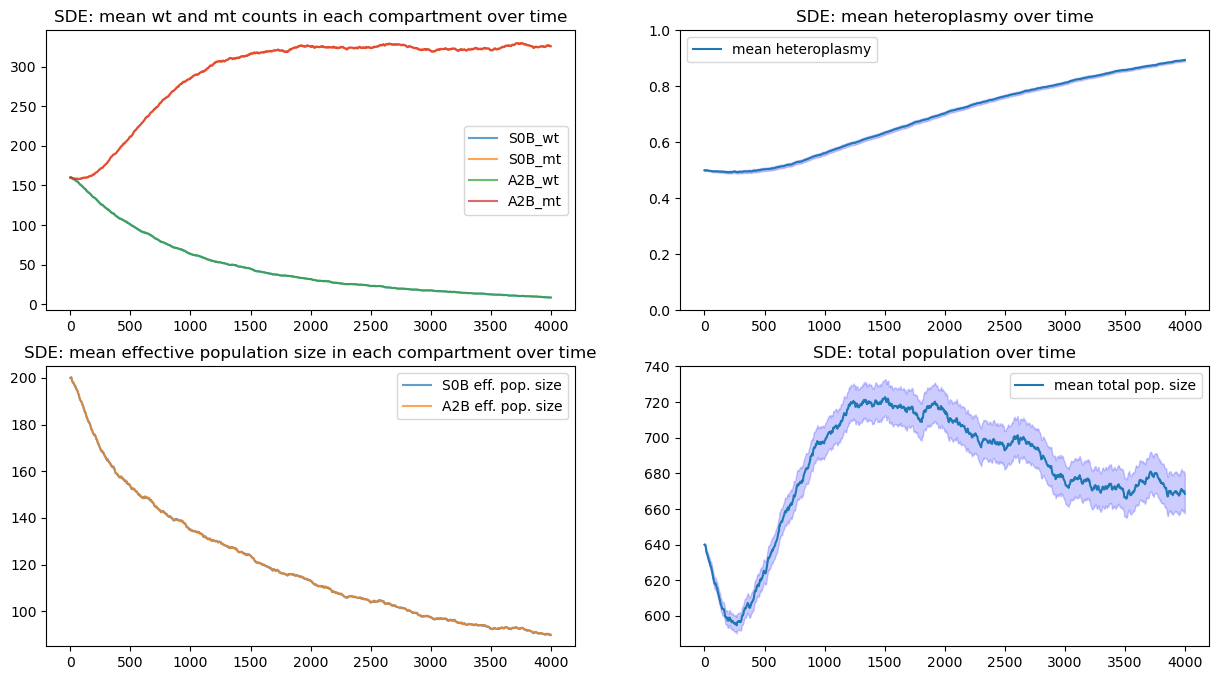


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.8939 +-0.0044
delta: 0.3939

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00     400.0     0.00    0.5000   0.0000     0.00   0.0000  0.0000     160.00      0.00     160.00       0.0      160.0      0.00     160.00       0.0
1000    668.53    11.05     179.7     2.84    0.8939   0.0062     0.44   0.0522  0.5078       8.36      0.58     325.82       5.6        8.4      0.59     325.95       5.6

simulating using tau leaping...


100%|██████████| 5000/5000 [02:04<00:00, 40.24it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000   0.000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    676.81    11.12    180.07     2.85    0.9076   0.0059   0.4438   0.0452   0.511       7.24      0.54     331.02      5.62       7.25      0.54     331.31      5.62


 ----- 


<<<< STARTING SIMULATION WITH C_B = 4e-05 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [05:46<00:00, 14.41it/s]


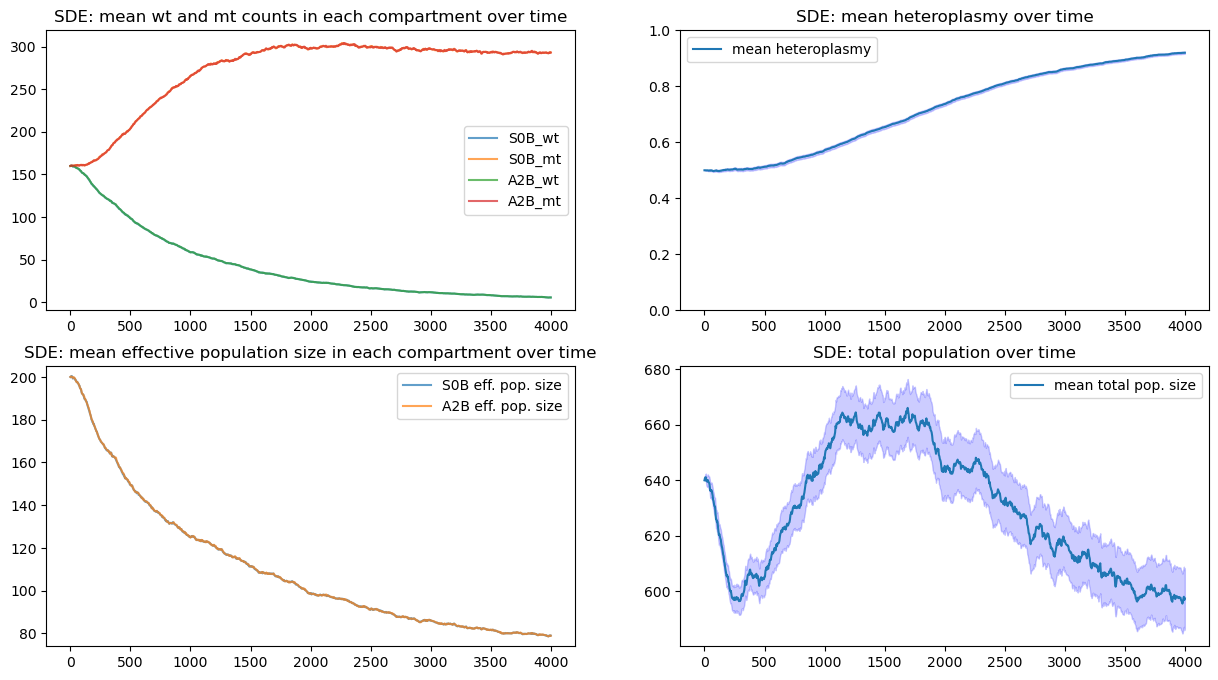


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.9198 +-0.0038
delta: 0.4198

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000   0.000     160.00       0.0     160.00      0.00     160.00       0.0     160.00      0.00
1000    597.38    10.84    157.89     2.79    0.9198   0.0058   0.4084   0.0356   0.556       5.71       0.5     293.03      5.47       5.68       0.5     292.96      5.46

simulating using tau leaping...


100%|██████████| 5000/5000 [01:55<00:00, 43.11it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    606.86    10.92    160.57     2.83    0.9252   0.0056   0.4104   0.0332  0.5564       5.93      0.54     297.77      5.51       5.89      0.53     297.27      5.49


 ----- 


<<<< STARTING SIMULATION WITH C_B = 3e-05 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [05:08<00:00, 16.19it/s]


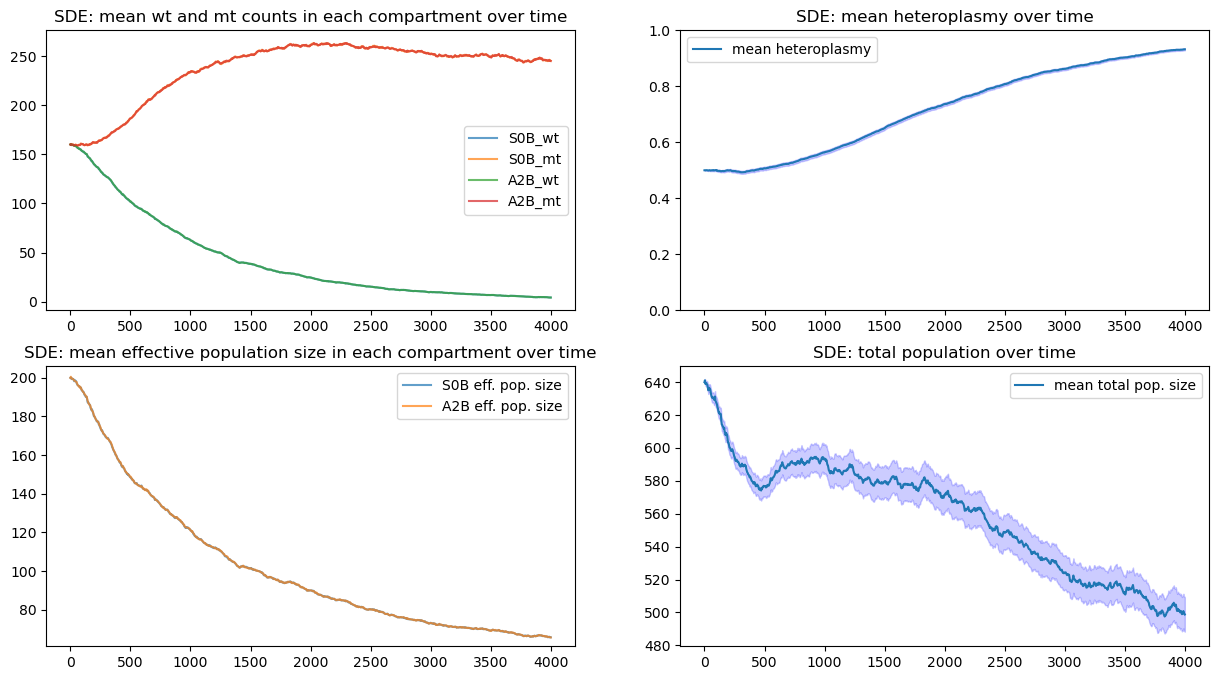


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.932 +-0.0036
delta: 0.432

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00     0.500   0.0000    0.000   0.0000  0.0000     160.00      0.00      160.0      0.00     160.00      0.00     160.00      0.00
1000    498.75    10.47    131.21     2.71     0.932   0.0058    0.351   0.0256  0.6234       4.37      0.47      245.1      5.26       4.32      0.47     244.95      5.25

simulating using tau leaping...


100%|██████████| 5000/5000 [01:43<00:00, 48.32it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    477.62    10.41    125.45     2.69    0.9366   0.0058   0.3366   0.0228  0.6406       4.02      0.45     234.74      5.23       4.05      0.46     234.81      5.22


 ----- 


<<<< STARTING SIMULATION WITH C_B = 2e-05 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [04:20<00:00, 19.22it/s]


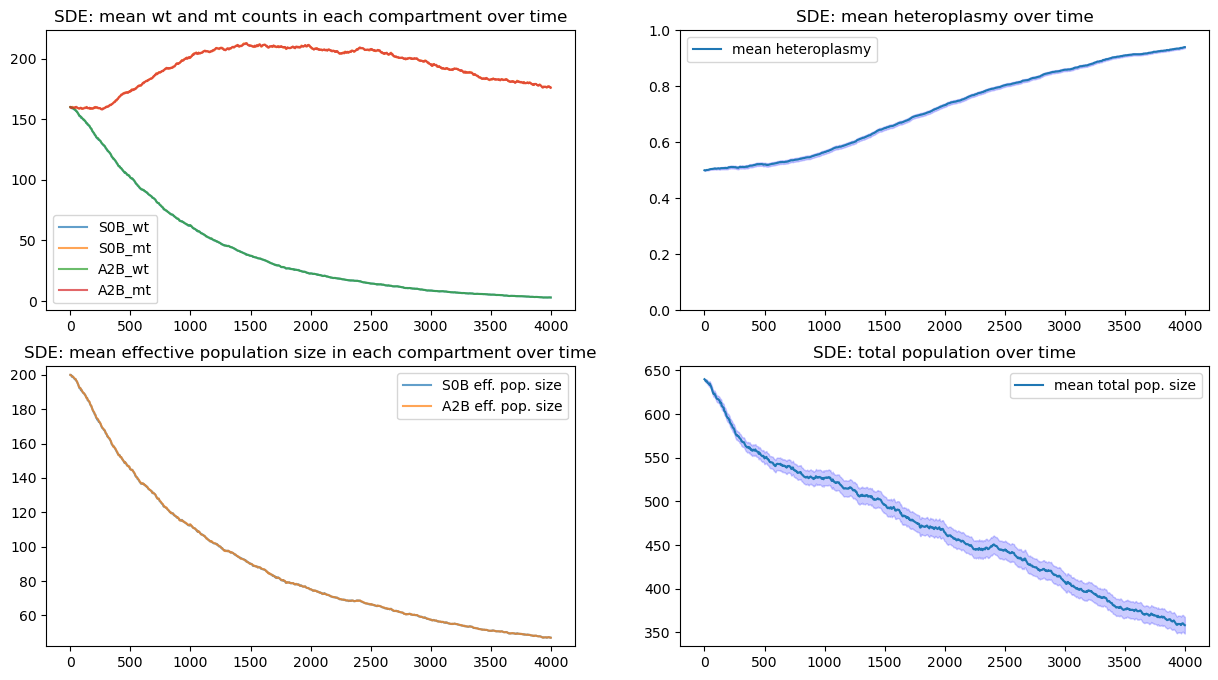


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.9398 +-0.0034
delta: 0.4398

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00       0.0     160.00      0.00     160.00       0.0
1000    358.05     9.58     93.99     2.48    0.9398   0.0064   0.2624   0.0168  0.7208       2.97      0.39     176.13       4.8       2.99      0.39     175.96       4.8

simulating using tau leaping...


100%|██████████| 5000/5000 [01:33<00:00, 53.55it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00     0.500   0.0000   0.0000   0.0000  0.0000      160.0      0.00     160.00      0.00      160.0      0.00     160.00      0.00
1000    362.95     9.48     95.69     2.47     0.937   0.0064   0.2706   0.0182  0.7112        3.3      0.41     178.04      4.74        3.3      0.41     178.31      4.76


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-05 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [03:30<00:00, 23.76it/s]


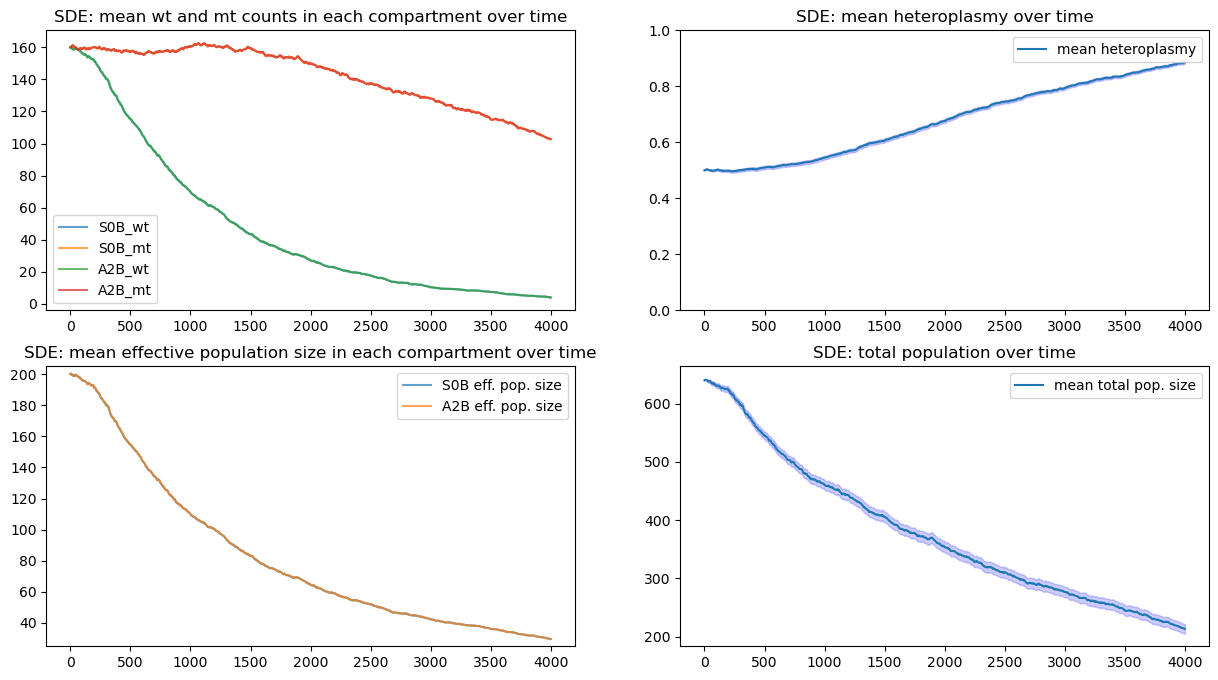


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.8852 +-0.0045
delta: 0.3852

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000     0.00  0.0000      160.0       0.0     160.00      0.00     160.00      0.00     160.00      0.00
1000    213.45     8.13     59.33     2.22    0.8852   0.0108   0.1542     0.02  0.8256        4.0       0.5     102.76      4.06       3.96      0.49     102.73      4.05

simulating using tau leaping...


100%|██████████| 5000/5000 [01:18<00:00, 63.31it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00      0.0    0.5000   0.0000   0.0000   0.0000   0.000     160.00      0.00     160.00      0.00     160.00      0.00     160.00       0.0
1000    223.21     8.41     61.69      2.3    0.8938   0.0104   0.1582   0.0188   0.823       3.93      0.51     107.55      4.19       3.91      0.51     107.82       4.2


 ----- 


<<<< STARTING SIMULATION WITH C_B = 5e-06 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [03:30<00:00, 23.78it/s]


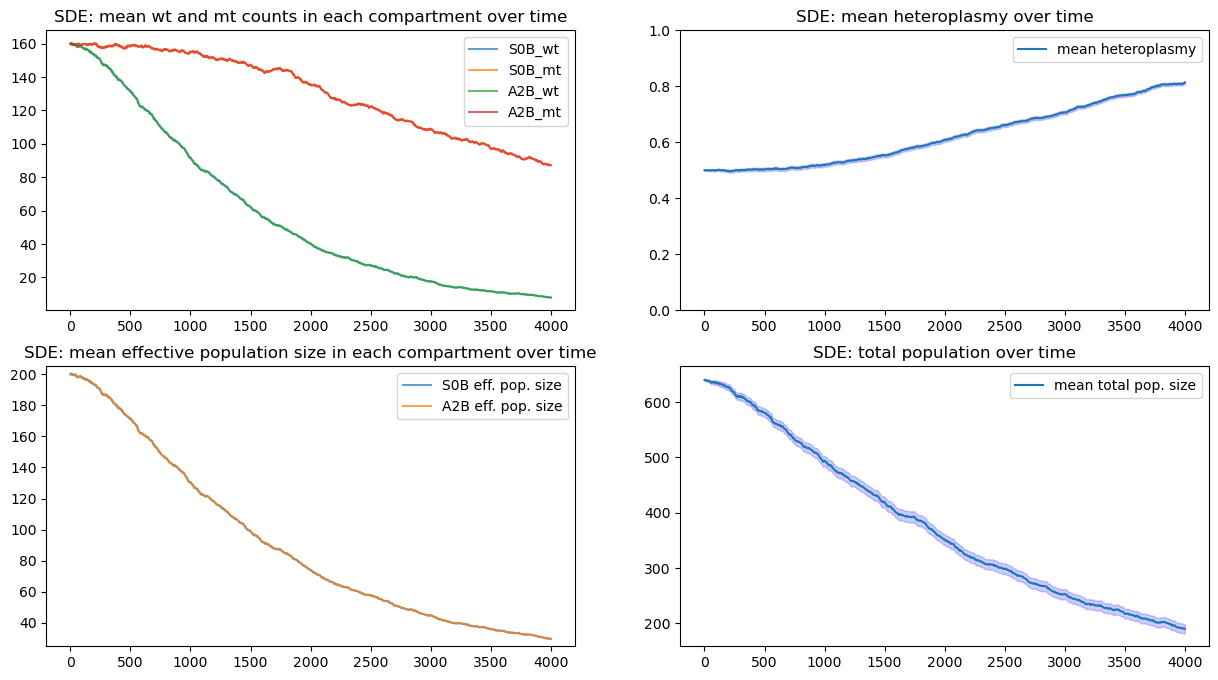


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.8134 +-0.0055
delta: 0.3134

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00      160.0      0.00     160.00      0.00     160.00      0.00
1000    190.34     8.58     59.49     2.66    0.8134   0.0144   0.1194   0.0274  0.8532       7.93      0.85       87.2      4.24       7.95      0.85      87.27      4.24

simulating using tau leaping...


100%|██████████| 5000/5000 [01:14<00:00, 66.74it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00      0.0    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    178.01     8.24     54.96      2.5    0.8125   0.0149   0.1118   0.0258  0.8622       6.92      0.76      81.93      4.08       7.02      0.76      82.13      4.08


 ----- 


<<<< STARTING SIMULATION WITH C_B = 2.5e-06 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [03:42<00:00, 22.43it/s]


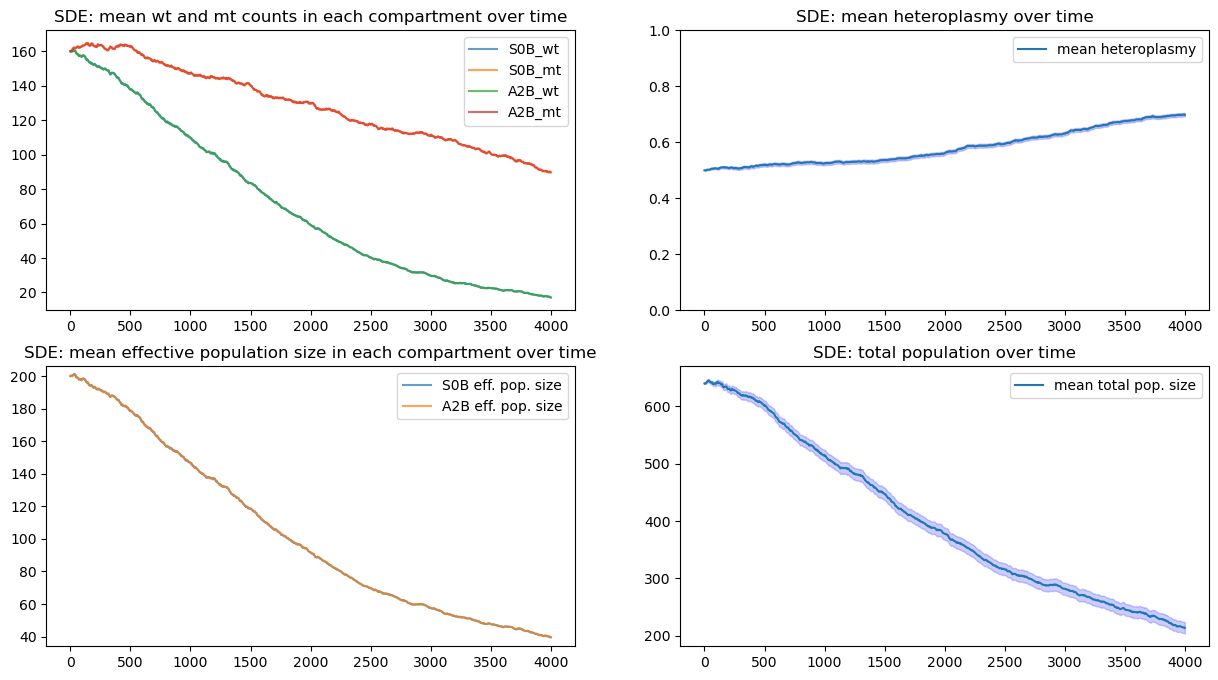


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.6981 +-0.0065
delta: 0.1981

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00      160.0      0.00     160.00      0.00
1000    213.57     9.78     78.98     3.67    0.6981   0.0168   0.1038   0.0444  0.8504      17.02      1.45      89.74      4.73       17.1      1.45      89.72      4.73

simulating using tau leaping...


100%|██████████| 5000/5000 [01:15<00:00, 65.99it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00     0.500   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    210.35     9.73     72.76     3.29     0.723   0.0167   0.1036   0.0396  0.8562      13.37      1.19      91.68      4.77      13.52      1.19      91.77      4.77


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-06 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [04:20<00:00, 19.22it/s]


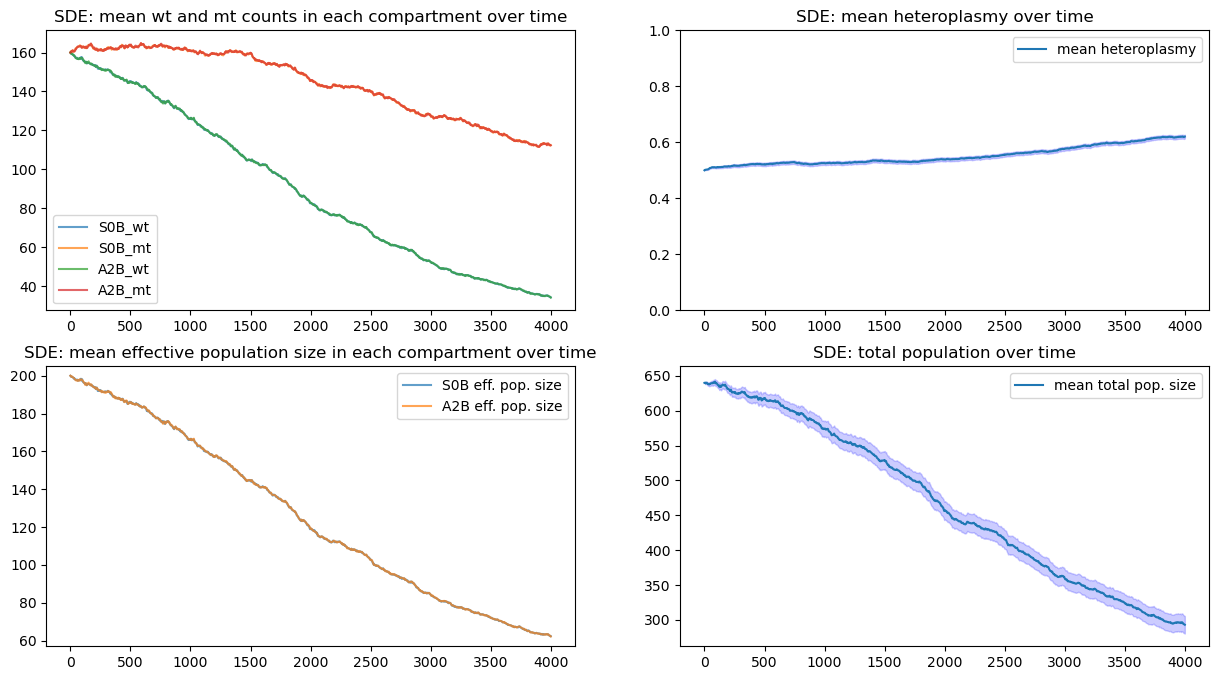


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.6202 +-0.0068
delta: 0.1202

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0        640.0     0.00    400.00     0.00    0.5000   0.0000   0.0000    0.000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000     293.1    12.63    124.52     5.48    0.6202   0.0165   0.1054    0.064  0.8288      34.22      2.37     112.41      5.97      34.11      2.37     112.35      5.98

simulating using tau leaping...


100%|██████████| 5000/5000 [01:21<00:00, 61.48it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0
pooled t-test p-value: 0.0

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00      0.0    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    282.79    12.57    125.63      5.8    0.6008   0.0168   0.0988   0.0656  0.8324      36.49      2.56     104.88      5.84      36.75      2.56     104.67      5.82


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-07 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [05:19<00:00, 15.66it/s]


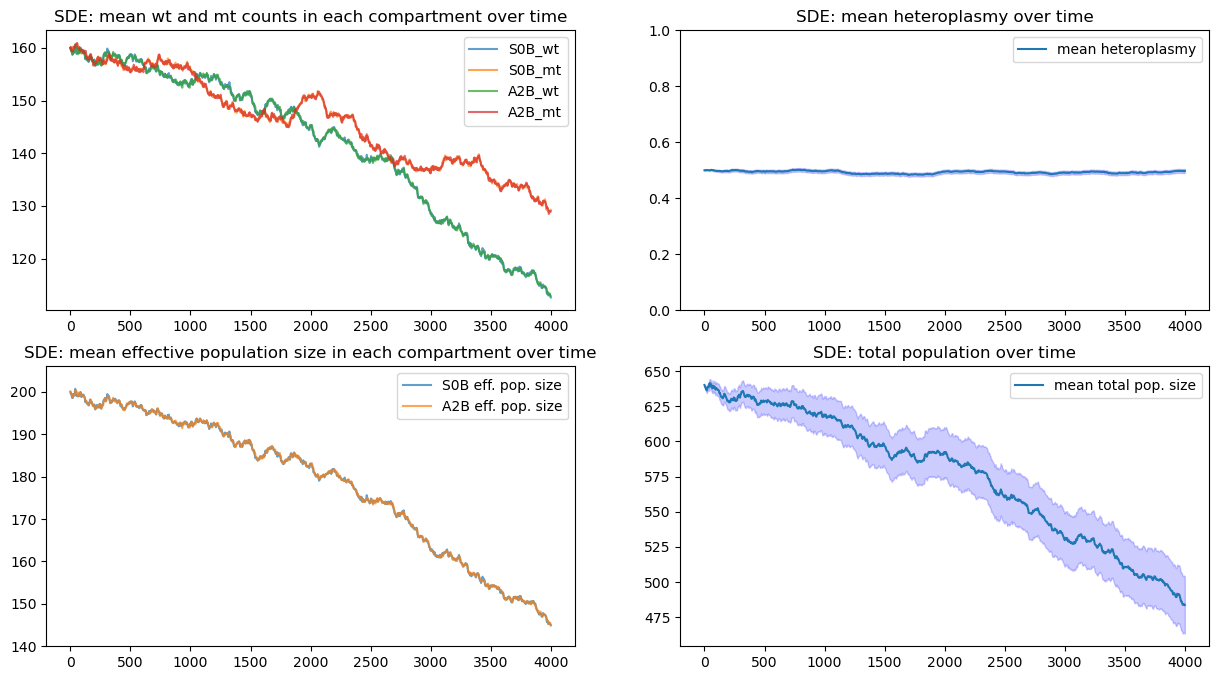


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.4978 +-0.007
delta: -0.0022

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.4676
  wilcox test p-value: 0.4921
pooled t-test p-value: 0.6414

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00      0.0    400.00     0.00    0.5000    0.000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    483.74     20.3    290.06    13.77    0.4978    0.016   0.0904   0.0902  0.8114     112.61      6.64     129.25      7.82     112.89      6.65     128.99      7.82

simulating using tau leaping...


100%|██████████| 5000/5000 [01:26<00:00, 57.66it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0
  wilcox test p-value: 0.0326
pooled t-test p-value: 0.0122

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0        640.0     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00      160.0      0.00     160.00      0.00     160.00      0.00
1000     492.3    21.32    276.33    13.05    0.5287   0.0161   0.0938   0.0828  0.8144     102.28      6.18      144.0      8.75     102.07      6.17     143.95      8.76


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-08 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [05:47<00:00, 14.40it/s]


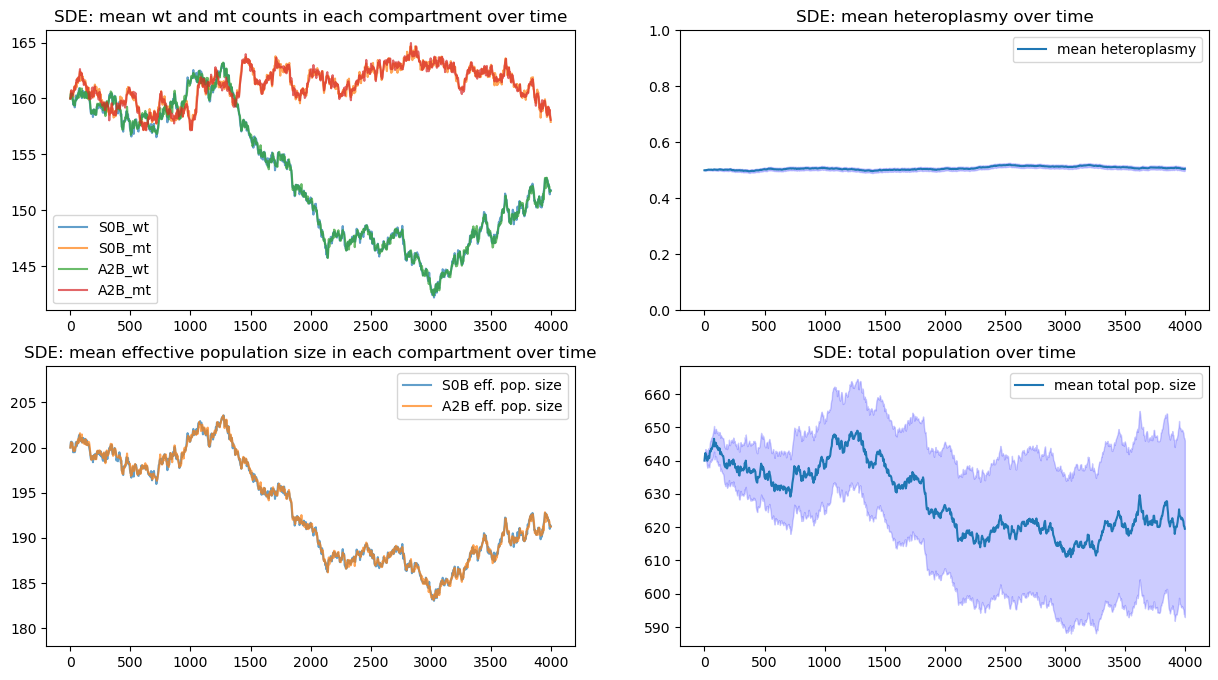


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5053 +-0.0069
delta: 0.0053

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.1393
  wilcox test p-value: 0.4277
pooled t-test p-value: 0.3364

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0        640.0     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000      160.0      0.00      160.0      0.00     160.00      0.00     160.00      0.00
1000     619.5    26.54    382.51    19.06    0.5053   0.0155   0.0936   0.0926  0.8008      151.8      9.21      157.9      9.47     151.72      9.22     158.09      9.48

simulating using tau leaping...


100%|██████████| 5000/5000 [01:31<00:00, 54.88it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0012
  wilcox test p-value: 0.1267
pooled t-test p-value: 0.2547

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00      160.0      0.00     160.00      0.00     160.00      0.00
1000    630.92    26.21    377.63    17.83    0.5159   0.0152   0.1016   0.0944  0.7918     146.65      8.57      168.8      9.91     146.55      8.55     168.92      9.89


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-09 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [05:48<00:00, 14.36it/s]


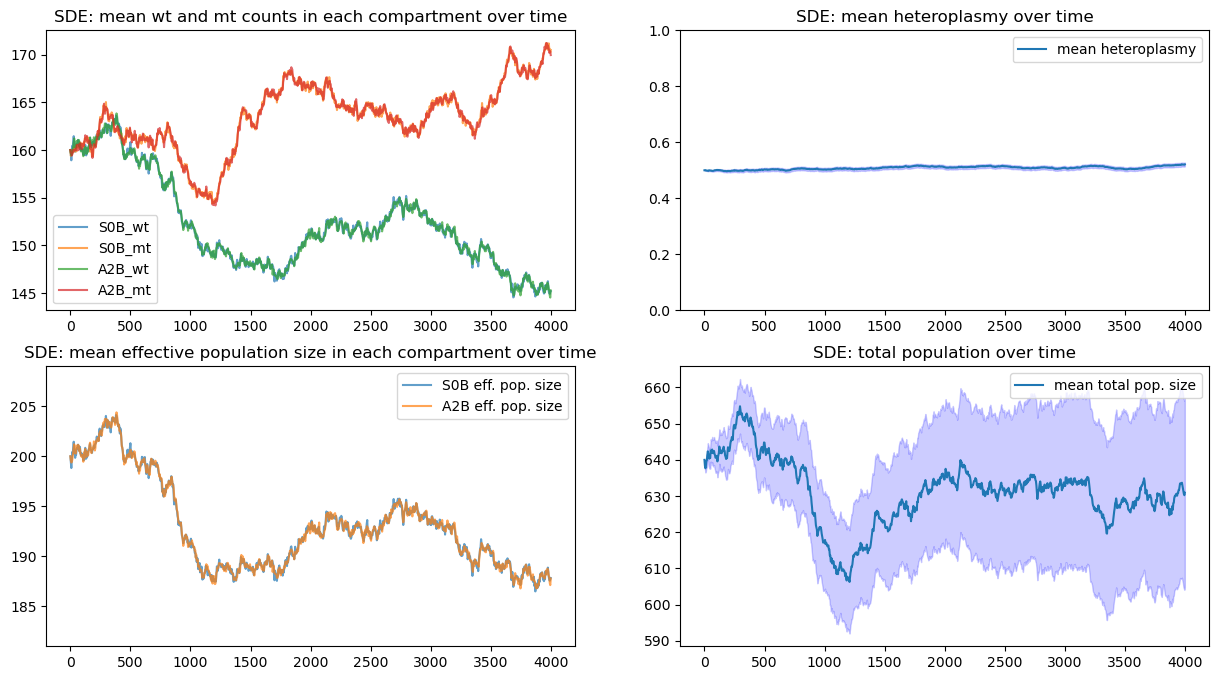


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.5209 +-0.0069
delta: 0.0209

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0004
  wilcox test p-value: 0.1225
pooled t-test p-value: 0.1235

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000      160.0      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    630.92    26.18    375.59    18.15    0.5209   0.0155   0.0976   0.0906  0.8006      145.2      8.77     170.49      9.88     145.27      8.78     169.96      9.86

simulating using tau leaping...


100%|██████████| 5000/5000 [01:30<00:00, 54.98it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0768
  wilcox test p-value: 0.1974
pooled t-test p-value: 0.1765

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00      0.0    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00      160.0      0.00     160.00      0.00     160.00      0.00
1000    667.17     27.5    412.53    19.92    0.5108   0.0152   0.0982   0.0928  0.7942     163.76      9.65      169.5      9.74     163.89      9.65     170.02      9.77


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-10 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [05:46<00:00, 14.43it/s]


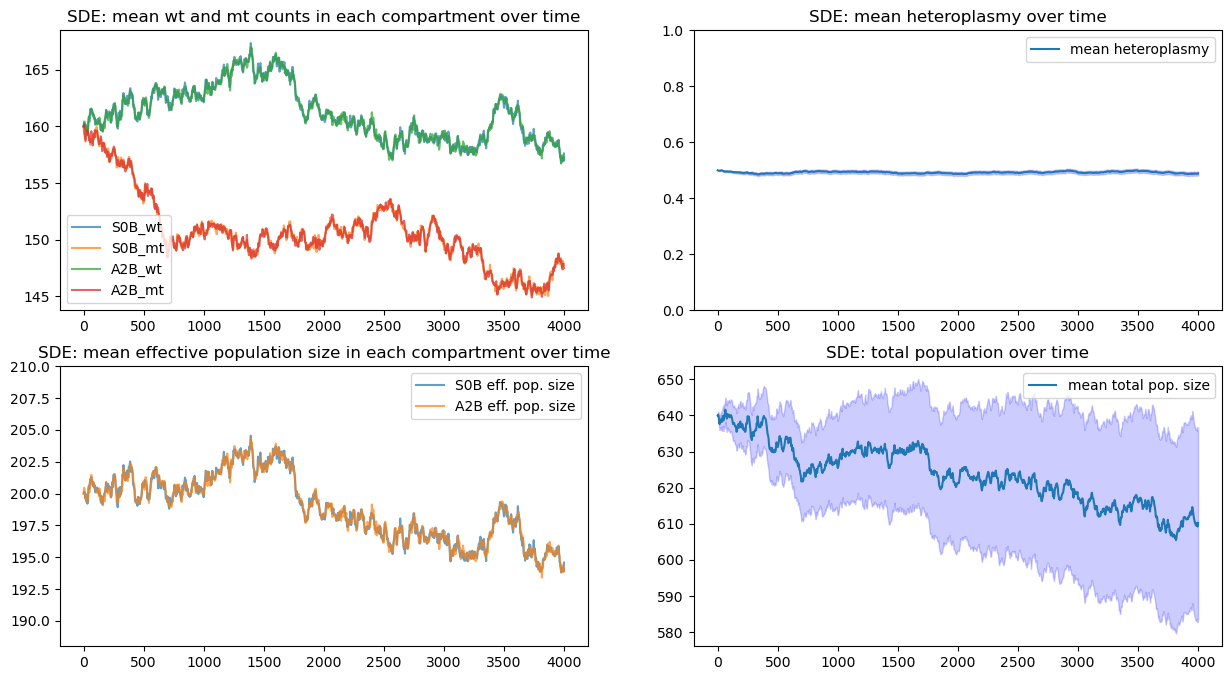


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.4886 +-0.0069
delta: -0.0114

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.9703
  wilcox test p-value: 0.7662
pooled t-test p-value: 0.9055

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000   0.000     160.00      0.00     160.00       0.0      160.0      0.00     160.00      0.00
1000    610.23    26.53    388.74    19.51    0.4886   0.0157   0.0902   0.0946   0.804     157.61      9.49     147.85       9.3      157.3      9.46     147.48      9.27

simulating using tau leaping...


100%|██████████| 5000/5000 [01:29<00:00, 55.96it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.6794
  wilcox test p-value: 0.6006
pooled t-test p-value: 0.4889

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00      0.0    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00       0.0     160.00      0.00     160.00      0.00
1000    641.97    27.75    405.09     20.4    0.4972   0.0156   0.0926   0.0942  0.8016     163.38      9.92     158.03       9.7     162.75      9.89     157.81      9.67


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-11 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [06:07<00:00, 13.61it/s]


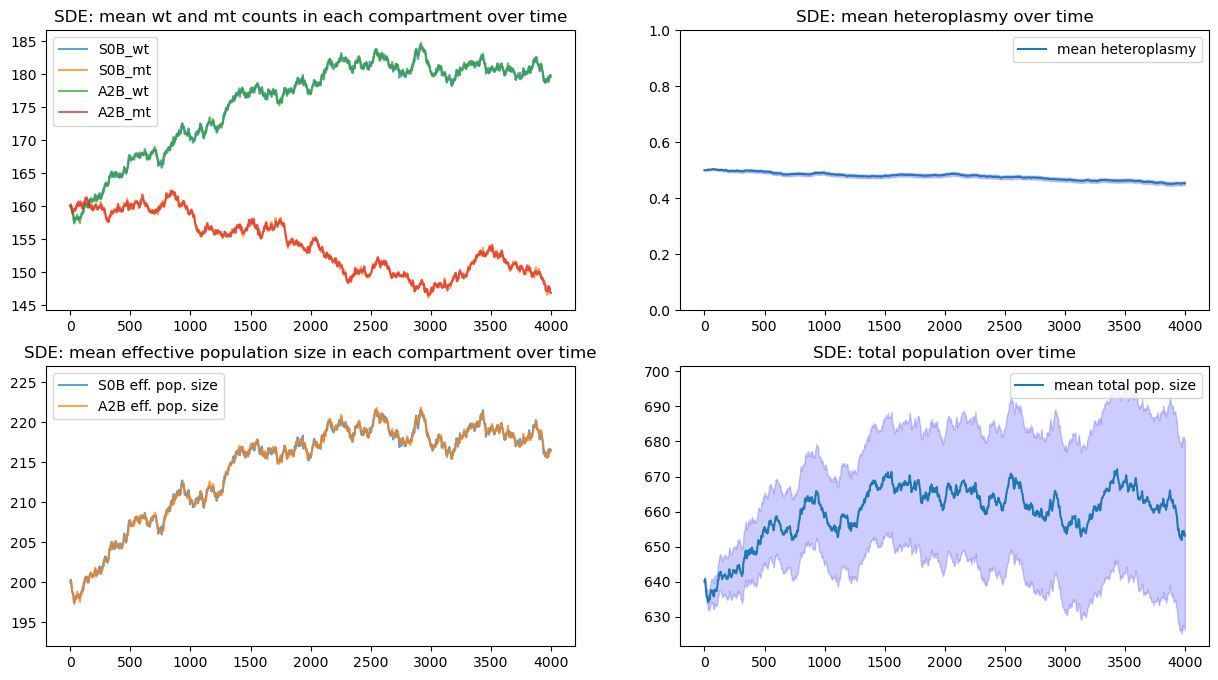


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.4537 +-0.0069
delta: -0.0463

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 1.0
  wilcox test p-value: 0.9981
pooled t-test p-value: 0.9989

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000    0.000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    653.16    26.87    432.88    20.52    0.4537    0.015   0.0896   0.1076  0.7902     179.84     10.05     146.86      9.05     179.61     10.02     146.84      9.05

simulating using tau leaping...


100%|██████████| 5000/5000 [01:30<00:00, 55.32it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.9991
  wilcox test p-value: 0.7997
pooled t-test p-value: 0.9402

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000    0.000   0.0000  0.0000     160.00       0.0     160.00      0.00     160.00       0.0     160.00      0.00
1000    611.82    26.26    388.59    19.41    0.4823   0.0156    0.089   0.0938  0.8032     157.01       9.4     149.01      9.01     157.17       9.4     148.62      8.99


 ----- 


<<<< STARTING SIMULATION WITH C_B = 1e-12 >>>>

simulating using gillespie...


100%|██████████| 5000/5000 [05:57<00:00, 14.00it/s]


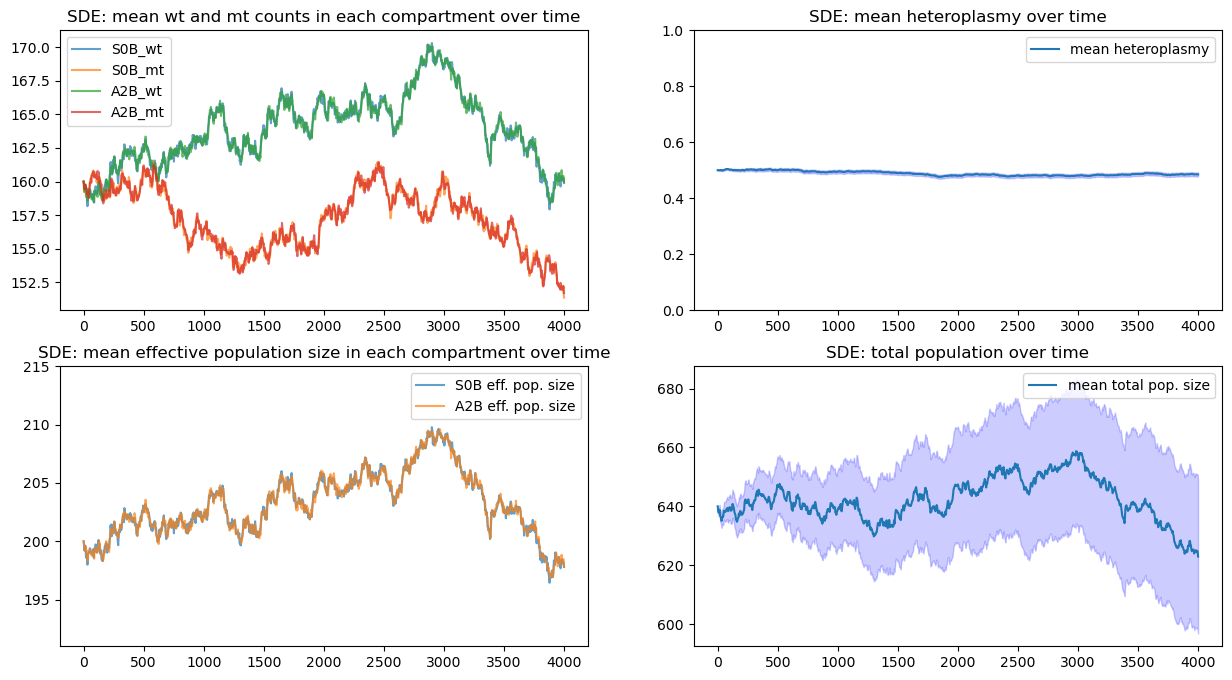


> Change in mean heteroplasmy: 
start: 0.5 +-0.0
final: 0.4853 +-0.0069
delta: -0.0147

> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.9907
  wilcox test p-value: 0.7979
pooled t-test p-value: 0.7431

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0       640.00     0.00    400.00     0.00    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000    622.94    26.15    395.62    19.31    0.4853   0.0156   0.0904   0.0954  0.8036     159.96      9.39     151.38      9.08     159.89      9.38     151.71      9.11

simulating using tau leaping...


100%|██████████| 5000/5000 [01:32<00:00, 54.26it/s]



> Statistical tests: end heteroplasmy > start heteroplasmy:
 mann-whitney p-value: 0.0001
  wilcox test p-value: 0.0824
pooled t-test p-value: 0.2532

      pop_mean  pop_sem  eps_mean  eps_sem  het_mean  het_sem  p_het_1  p_het_0  p_pop0  s_wt_mean  s_wt_sem  s_mt_mean  s_mt_sem  a_wt_mean  a_wt_sem  a_mt_mean  a_mt_sem
0        640.0     0.00    400.00      0.0    0.5000   0.0000   0.0000   0.0000  0.0000     160.00      0.00     160.00      0.00     160.00      0.00     160.00      0.00
1000     653.4    27.19    396.94     20.0    0.5224   0.0155   0.0972   0.0888  0.8016     155.78      9.71     170.74      9.45     155.68      9.69     171.21      9.48


 ----- 



In [4]:
TIME_POINTS = np.linspace(0, 4000, 1001)
REP = 5000


for c_b in C_B_val:
    print(f"\n<<<< STARTING SIMULATION WITH C_B = {c_b} >>>>\n")
    
    G.nodes()['S0B']['c_b'] = c_b

#     # infer the ode model
#     ode_model = ode_from_network(G, prnt=True)

#     # run the ode model
#     ode_results = simulate_ode(ode_model, TIME_POINTS, START_STATE)
#     plot_ode_results(ode_results, TIME_POINTS, DELTA, VARS, NODES, prnt=False)

    # infer the parameterse of the sde systems
    SDE_PARAM = sde_param_from_network(G, prnt=False)

    # run the gillespie simulation
    gillespie_results = simulate_gillespie(SDE_PARAM, TIME_POINTS, START_STATE, replicates=REP)
    plot_sde_results(gillespie_results, TIME_POINTS, DELTA, VARS, NODES, prnt = False)
    df_g = two_component_statistics(gillespie_results, DELTA)
    print(df_g.iloc[[0, -1]]);print()
    
    # run the tau leaping simulation
    tauleaping_results = simulate_tauleaping(SDE_PARAM, TIME_POINTS, START_STATE, replicates=REP, timestep=0.01)
    #plot_sde_results(tauleaping_results, TIME_POINTS, DELTA, VARS, NODES, prnt = False)
    df_t = two_component_statistics(tauleaping_results, DELTA)
    print(df_t.iloc[[0, -1]]);print()
    
    print("\n ----- \n")
    